Load

In [33]:
import pandas as pd
from pathlib import Path

In [34]:
HERE = Path('D:\MaxStorage\PRECIOUS\Ameriduo\csv\gradebook\data\roster.csv').parent
DATA_FOLDER = HERE / "D:\MaxStorage\PRECIOUS\Ameriduo\csv\gradebook\data"

roster = pd.read_csv(
    DATA_FOLDER / "roster.csv",
    converters={"NetID": str.lower, "Email Address": str.lower},
    usecols=["Section", "Email Address", "NetID"],
    index_col="NetID",
)

In [35]:
df = pd.DataFrame(roster)
df

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2
...,...,...
pmj37756,paul.johnson@univ.edu,3
dsl24347,danielle.lee@univ.edu,3
nxe44872,nicole.edwards@univ.edu,3


In [36]:
hw_exam_grades = pd.read_csv(
    DATA_FOLDER / "hw_exam_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda x: "Submission" not in x,
    index_col="SID",
)

In [37]:
df = pd.DataFrame(hw_exam_grades)
df

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
txw75701,Travis,Washington,64.0,80,67,80,56,80,92,100,...,40,60,52,60,94,100,74,100,68,100
tbr17292,Troy,Raymond,50.0,80,59,80,79,80,98,100,...,45,60,49,60,91,100,67,100,100,100
vkb66346,Victoria,Boyd,58.0,80,61,80,75,80,99,100,...,40,60,50,60,68,100,93,100,69,100


In [38]:
quiz_grades = pd.DataFrame()
for file_path in DATA_FOLDER.glob("quiz_3_grades.csv"):
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"],
    ).rename(columns={"Grade": quiz_name})
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)
quiz_grades

,Quiz 3
Email,
brandon.thomas@univ.edu,13
john.g.2.flower@univ.edu,8
taylor.hernandez@univ.edu,14
tamara.warren@univ.edu,16
felicia.simpson@univ.edu,13
...,...
amy.adams@univ.edu,12
steven.roberts@univ.edu,8
woody.barrera_jr@univ.edu,11


Merge

In [39]:
final_data = pd.merge(
    roster, hw_exam_grades, left_index=True, right_index=True
)
final_data = pd.merge(
    final_data, quiz_grades, left_on="Email Address", right_index=True
)
final_data = final_data.fillna(0)


Calculate

In [40]:
n_exams = 3
for n in range(1, n_exams + 1):
    final_data[f"Exam {n} Score"] = (
        final_data[f"Exam {n}"] / final_data[f"Exam {n} - Max Points"]
    )

In [41]:
homework_scores = final_data.filter(regex=r"^Homework \d\d?$", axis=1)
homework_max_points = final_data.filter(regex=r"^Homework \d\d? -", axis=1)

In [42]:
sum_of_hw_scores = homework_scores.sum(axis=1)
sum_of_hw_max = homework_max_points.sum(axis=1)
final_data["Total Homework"] = sum_of_hw_scores / sum_of_hw_max

In [43]:
hw_max_renamed = homework_max_points.set_axis(homework_scores.columns, axis=1)
average_hw_scores = (homework_scores / hw_max_renamed).sum(axis=1)

In [44]:
final_data["Average Homework"] = average_hw_scores / homework_scores.shape[1]

In [45]:
final_data["Homework Score"] = final_data[
    ["Total Homework", "Average Homework"]
].max(axis=1)

In [49]:
quiz_scores = final_data.filter(regex=r"^Quiz \d$", axis=1)
quiz_max_points = pd.Series(
    {"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12}
)

sum_of_quiz_scores = quiz_scores.sum(axis=1)
sum_of_quiz_max = quiz_max_points.sum()
final_data["Total Quizzes"] = sum_of_quiz_scores / sum_of_quiz_max

average_quiz_scores = (quiz_scores / quiz_max_points).sum(axis=1)
final_data["Average Quizzes"] = average_quiz_scores / quiz_scores.shape[1]

final_data["Quiz Score"] = final_data[
    ["Total Quizzes", "Average Quizzes"]
].max(axis=1)

In [48]:
weightings = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.4,
    }
)

In [46]:
import numpy as np

In [50]:
final_data["Final Score"] = (final_data[weightings.index] * weightings).sum(
    axis=1
)
final_data["Ceiling Score"] = np.ceil(final_data["Final Score"] * 100)

In [51]:
grades = {
    90: "A",
    80: "B",
    70: "C",
    60: "D",
    0: "F",
}

def grade_mapping(value):
    for key, letter in grades.items():
        if value >= key:
            return letter

In [59]:
letter_grades = final_data["Ceiling Score"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=True
)

Grouping

In [60]:
for section, table in final_data.groupby("Section"):
    section_file = DATA_FOLDER / f"Section {section} Grades.csv"
    num_students = table.shape[0]
    print(
        f"In Section {section} there are {num_students} students saved to "
        f"file {section_file}."
    )
    table.sort_values(by=["Last Name", "First Name"]).to_csv(section_file)

In Section 1 there are 56 students saved to file D:\MaxStorage\PRECIOUS\Ameriduo\csv\gradebook\data\Section 1 Grades.csv.
In Section 2 there are 51 students saved to file D:\MaxStorage\PRECIOUS\Ameriduo\csv\gradebook\data\Section 2 Grades.csv.
In Section 3 there are 43 students saved to file D:\MaxStorage\PRECIOUS\Ameriduo\csv\gradebook\data\Section 3 Grades.csv.


In [56]:
import matplotlib.pyplot as plt

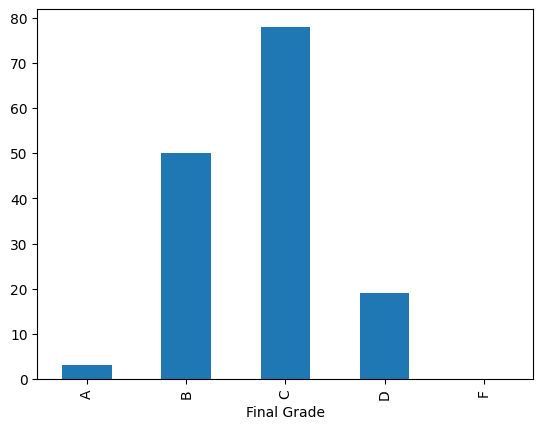

In [61]:
# Check if "Final Grade" is in the columns
if "Final Grade" in final_data.columns:
    # If it exists, proceed with plotting
    grade_counts = final_data["Final Grade"].value_counts().sort_index()
    grade_counts.plot.bar()
    plt.show()
else:
    print("Column 'Final Grade' not found in the DataFrame.")

In [65]:
import scipy

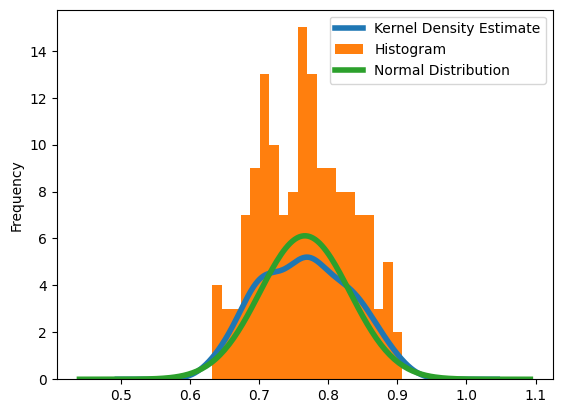

In [68]:
final_data["Final Score"].plot.density(
    linewidth=4, label="Kernel Density Estimate"
)

final_mean = final_data["Final Score"].mean()
final_std = final_data["Final Score"].std()
x = np.linspace(final_mean - 5 * final_std, final_mean + 5 * final_std, 200)
normal_dist = scipy.stats.norm.pdf(x, loc=final_mean, scale=final_std)
final_data["Final Score"].plot.hist(bins=20, label="Histogram")
plt.plot(x, normal_dist, label="Normal Distribution", linewidth=4)
plt.legend()
plt.show()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3 Score,Total Homework,Average Homework,Homework Score,Total Quizzes,Average Quizzes,Quiz Score,Final Score,Ceiling Score,Final Grade
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,0.90,0.808108,0.799405,0.808108,0.159420,0.647059,0.647059,0.757361,76.0,C
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,0.93,0.827027,0.818944,0.827027,0.144928,0.588235,0.588235,0.767781,77.0,C
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,0.64,0.785135,0.785940,0.785940,0.202899,0.823529,0.823529,0.791435,80.0,B
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,0.77,0.770270,0.765710,0.770270,0.115942,0.470588,0.470588,0.683785,69.0,D
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,0.86,0.782432,0.787742,0.787742,0.159420,0.647059,0.647059,0.766214,77.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,0.94,0.735135,0.733325,0.735135,0.130435,0.529412,0.529412,0.715878,72.0,C
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,0.90,0.822973,0.816865,0.822973,0.144928,0.588235,0.588235,0.741660,75.0,C
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,0.65,0.839189,0.841175,0.841175,0.130435,0.529412,0.529412,0.700293,71.0,C
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,0.71,0.779730,0.773690,0.779730,0.246377,1.000000,1.000000,0.835392,84.0,B


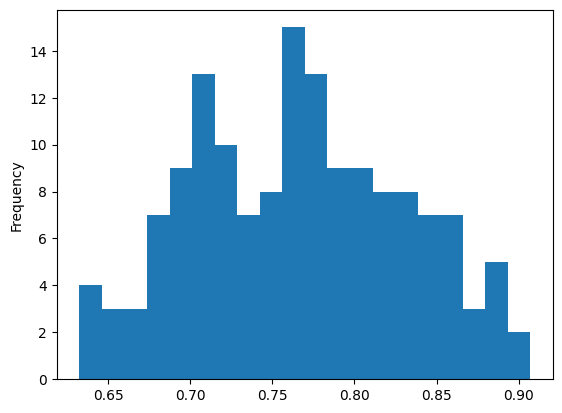

In [70]:
final_data["Final Score"].plot.hist(bins=20, label="Histogram")
final_data